In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['legend.title_fontsize'] = 11
mpl.rcParams['legend.fontsize'] = 11
mpl.rcParams['xtick.labelsize'] = 11
mpl.rcParams['ytick.labelsize'] = 11


Read metrics for different methods.

In [2]:
data = pd.read_csv('data/comparison.csv')
plot_data = data.melt(id_vars=['Method','Task'], value_vars=['ACC', 'SN', 'SP', 'PR', 'F1', 'MCC'])
plot_data.columns = ['Method', 'Task', 'Metric', 'Value']

Plot barplot to compare DeepSecE with existing binary classifiers.

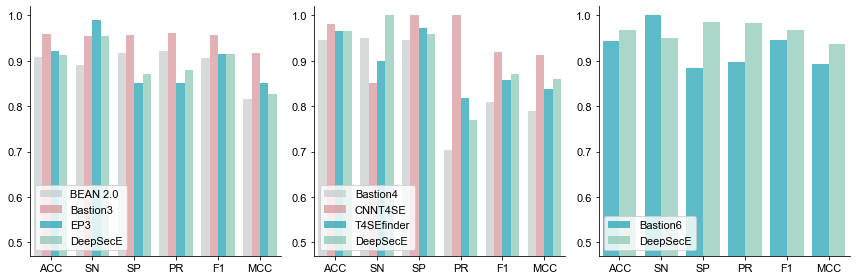

In [3]:
fig, axes = plt.subplots(1,3, figsize =(12,4))
model_to_color = {
    "pssm-cnn":"#c6cccc",
    # "tape-linear":"#F5C1CB",
    "esm1b-linear":"#e38690",
    "esm1b-finetune":"#00b3ca",
    "DeepSecE":"#7dd0b6"
}
color_list = list(model_to_color.values())
sns.barplot(x='Metric', y='Value', hue = 'Method', data=plot_data[plot_data['Task']=='T3SE'], palette=sns.color_palette(color_list), ax=axes[0], alpha=0.7)
sns.barplot(x='Metric', y='Value', hue = 'Method', data=plot_data[plot_data['Task']=='T4SE'], palette=sns.color_palette(color_list), ax=axes[1], alpha=0.7)
sns.barplot(x='Metric', y='Value', hue = 'Method', data=plot_data[plot_data['Task']=='T6SE'], palette=sns.color_palette(color_list[2:]), ax=axes[2], alpha=0.7)

for i in range(3):
    axes[i].set_ylabel('')
    axes[i].set_xlabel('')
    axes[i].set_ylim([0.47, 1.02])
    axes[i].legend(loc='lower left')

sns.despine()
plt.tight_layout()

plt.savefig("img/binary_model_comparison.png", dpi=300)
plt.savefig("pdf/binary_model_comparison.pdf")